# Lecture 02 The Holy Trinity of Tests 

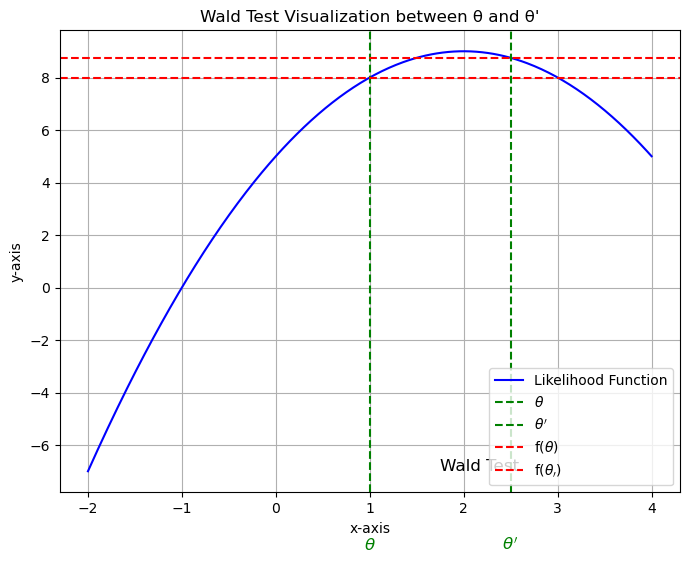

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create a concave curve using a quadratic function
x = np.linspace(-2, 4, 400)
y = -x**2 + 4*x + 5  # Concave function

# Define theta (θ) and theta prime (θ')
theta = 1
theta_prime = 2.5

# Plot the concave curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Likelihood Function', color='blue')

# Mark the points on the x-axis (θ and θ')
plt.axvline(theta, color='green', linestyle='--', label=r'$\theta$')
plt.axvline(theta_prime, color='green', linestyle='--', label=r'$\theta^{\prime}$')

# Add text for theta and theta'
plt.text(theta, -10, r'$\theta$', fontsize=12, color='green', ha='center')
plt.text(theta_prime, -10, r'$\theta^{\prime}$', fontsize=12, color='green', ha='center')

# Mark the "Wald Test" between theta and theta'
plt.annotate('Wald Test', xy=((theta + theta_prime) / 2, -7), fontsize=12)

# Mark the points on the y-axis
plt.axhline(-theta**2 + 4*theta + 5, color='red', linestyle='--', label=r'f($\theta$)')
plt.axhline(-theta_prime**2 + 4*theta_prime + 5, color='red', linestyle='--', label=r'f($\theta_{\prime}$)')

# Add text for f(theta) and f(theta')
plt.text(theta, -10, r'$\theta$', fontsize=12, color='green', ha='center')
plt.text(theta_prime, -10, r'$\theta^{\prime}$', fontsize=12, color='green', ha='center')

# Formatting the plot
plt.title("Wald Test Visualization between θ and θ'")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Visualizing the difference between the Wald Test, Likelihood Ratio (LR) Test, and Lagrange Multiplier (LM) Test can be done by simulating a simple statistical model (e.g., a linear regression model), and then plotting the distributions or test statistics used in each of the tests.<br>

**Overview of the Tests:**
- Wald Test: Compares an estimated parameter to a hypothesized value under the null hypothesis using the asymptotic normality of the estimator.
- Likelihood Ratio (LR) Test: Compares the likelihood of the full model (alternative hypothesis) to the restricted model (null hypothesis).
- Lagrange Multiplier (LM) Test: Evaluates the fit of the restricted model using the score (gradient) of the likelihood function at the restricted estimate.

**Steps to Visualize:**
We will simulate some data and fit a simple linear model. For each test, we will compute the test statistic and plot the corresponding distributions or the decision boundaries for rejecting or accepting the null hypothesis.
- Wald Test: We calculate the test statistic using the estimated parameter and its standard error.
- Likelihood Ratio (LR) Test: We compare the log-likelihoods of the full model (with slope) and the restricted model (without slope).
- Lagrange Multiplier (LM) Test: We approximate it by calculating the score (gradient of the likelihood function) at the restricted model.

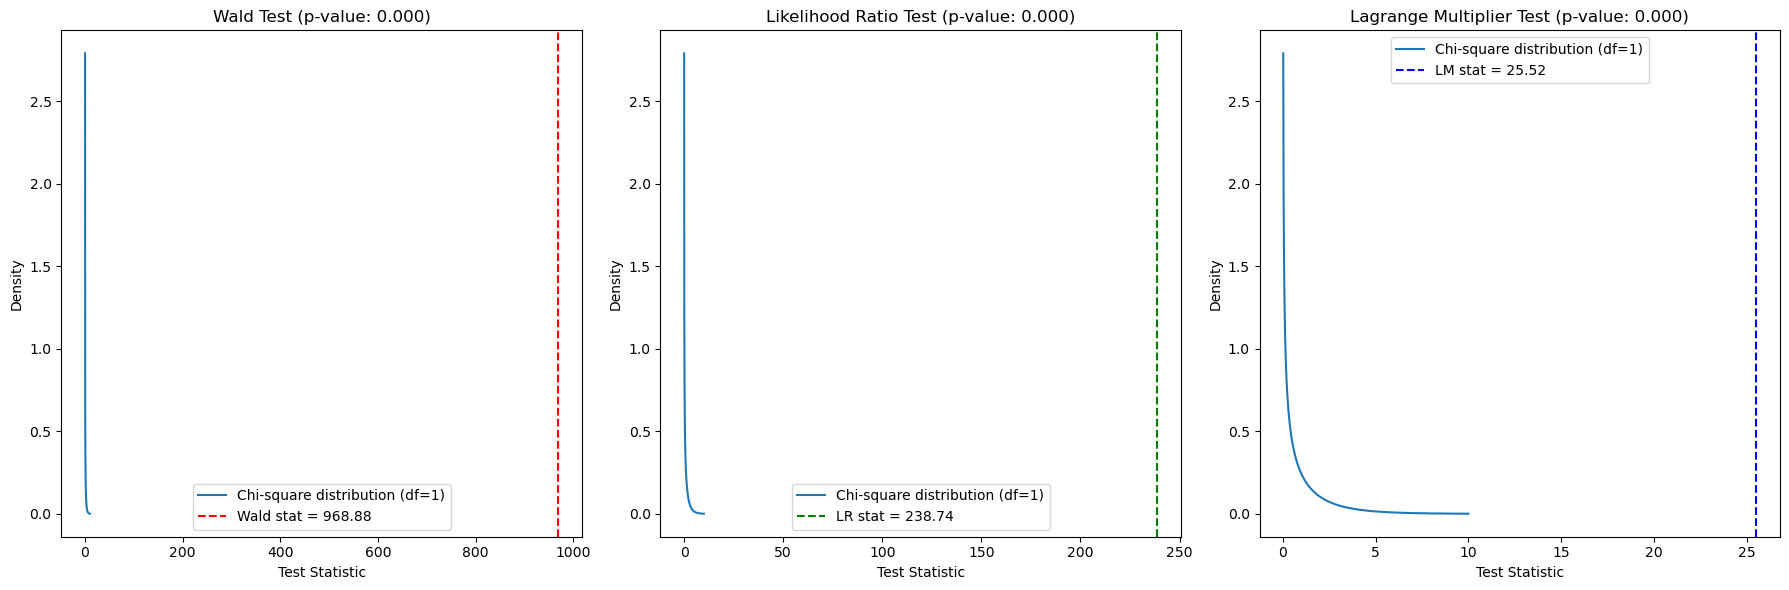

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

# Simulate some data for linear regression
np.random.seed(42)
n = 100
X = np.random.rand(n, 1) * 10  # Independent variable
X = np.column_stack([np.ones(n), X])  # Add a constant (intercept)
beta_true = [5, 2]  # True coefficients (intercept, slope)
y = X @ beta_true + np.random.normal(scale=2, size=n)  # Dependent variable

# Fit the full model (with slope) using OLS
beta_full = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred_full = X @ beta_full
residual_full = y - y_pred_full
sigma_full = np.sqrt(np.sum(residual_full**2) / (n - 2))
cov_full = sigma_full**2 * np.linalg.inv(X.T @ X)
se_beta_full = np.sqrt(np.diag(cov_full))  # Standard errors of coefficients

# Fit the restricted model (without slope) using OLS
X_restricted = X[:, 0].reshape(-1, 1)  # Only intercept
beta_restricted = np.linalg.inv(X_restricted.T @ X_restricted) @ X_restricted.T @ y
y_pred_restricted = X_restricted @ beta_restricted
residual_restricted = y - y_pred_restricted
sigma_restricted = np.sqrt(np.sum(residual_restricted**2) / (n - 1))

# ---- WALD TEST ----
wald_stat = (beta_full[1] / se_beta_full[1])**2  # Wald test statistic (t-value squared)
wald_p_value = 1 - stats.chi2.cdf(wald_stat, df=1)

# ---- LIKELIHOOD RATIO (LR) TEST ----
log_likelihood_full = -n / 2 * np.log(2 * np.pi * sigma_full**2) - np.sum(residual_full**2) / (2 * sigma_full**2)
log_likelihood_restricted = -n / 2 * np.log(2 * np.pi * sigma_restricted**2) - np.sum(residual_restricted**2) / (2 * sigma_restricted**2)
lr_stat = 2 * (log_likelihood_full - log_likelihood_restricted)
lr_p_value = 1 - stats.chi2.cdf(lr_stat, df=1)

# ---- LAGRANGE MULTIPLIER (LM) TEST ----
# Calculate score (gradient) and information matrix at the restricted model
score = X[:, 1].T @ residual_restricted / sigma_restricted**2  # Score for the restricted model
information_matrix = (X[:, 1].T @ X[:, 1]) / sigma_restricted**2  # Fisher information matrix
lm_stat = (score**2) / information_matrix  # LM test statistic
lm_p_value = 1 - stats.chi2.cdf(lm_stat, df=1)

# ---- Visualization ----
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot Wald Test
x_vals = np.linspace(0, 10, 500)
ax[0].plot(x_vals, stats.chi2.pdf(x_vals, df=1), label="Chi-square distribution (df=1)")
ax[0].axvline(wald_stat, color='red', linestyle='--', label=f'Wald stat = {wald_stat:.2f}')
ax[0].set_title(f'Wald Test (p-value: {wald_p_value:.3f})')
ax[0].set_xlabel('Test Statistic')
ax[0].set_ylabel('Density')
ax[0].legend()

# Plot Likelihood Ratio (LR) Test
ax[1].plot(x_vals, stats.chi2.pdf(x_vals, df=1), label="Chi-square distribution (df=1)")
ax[1].axvline(lr_stat, color='green', linestyle='--', label=f'LR stat = {lr_stat:.2f}')
ax[1].set_title(f'Likelihood Ratio Test (p-value: {lr_p_value:.3f})')
ax[1].set_xlabel('Test Statistic')
ax[1].set_ylabel('Density')
ax[1].legend()

# Plot Lagrange Multiplier (LM) Test
ax[2].plot(x_vals, stats.chi2.pdf(x_vals, df=1), label="Chi-square distribution (df=1)")
ax[2].axvline(lm_stat, color='blue', linestyle='--', label=f'LM stat = {lm_stat:.2f}')
ax[2].set_title(f'Lagrange Multiplier Test (p-value: {lm_p_value:.3f})')
ax[2].set_xlabel('Test Statistic')
ax[2].set_ylabel('Density')
ax[2].legend()

plt.tight_layout()
plt.show()

### Explanation of the Code:
- Data Simulation: We generate a dataset for a simple linear regression model with an intercept and a slope.
- Model Fitting: The full model includes both the intercept and the slope. The restricted model includes only the intercept (without the slope).
- Wald Test: The Wald test statistic is computed by squaring the ratio of the estimated coefficient (beta_full[1]) to its standard error. The p-value is obtained from the chi-squared distribution.
- Likelihood Ratio (LR) Test: The log-likelihoods of the full and restricted models are calculated, and the LR statistic is twice the difference between these log-likelihoods.
- Lagrange Multiplier (LM) Test: The score (gradient of the likelihood) and information matrix are calculated at the restricted model. The LM statistic is computed as the square of the score divided by the information matrix.
- Visualization: Each test statistic is plotted against the chi-squared distribution with 1 degree of freedom. Vertical lines show the value of each test statistic, along with the p-values for each test.

This code illustrates how the Wald, LR, and LM test statistics are calculated and visualizes their differences.